# CS6421 Assignment 2: Autoencoders

This assignment will focus on designing denoising autoencoders.

<a target="_blank" href="https://colab.research.google.com/github/andrew-nash/CS6421-labs-2025/blob/main/CS6421_Assignment_02.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

Due on  20/03/2025 at 23:59:59 UTC

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

## Task 1: Implementing A CNN-Based Denoising Auto-encoder

For task 1, we will fit a denoising autoencoder to the MNIST data.

We will train the autoencoder by fitting noisy inputs against clean outputs. We will manually add the noise to the inoputs

### Data

In [27]:
(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

np.random.seed(42)
x_train_noisy = x_train + np.random.normal(loc=0.0, scale=0.75, size=x_train.shape)
x_test_noisy = x_test + np.random.normal(loc=0.0, scale=0.75, size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)
print(x_train_noisy.shape)

(60000, 28, 28, 1)


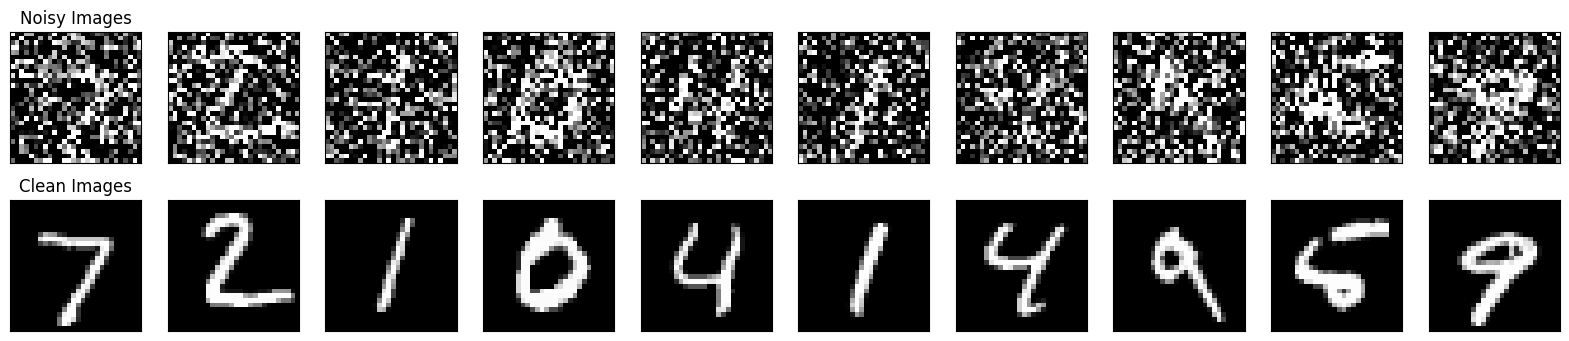

In [28]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == 0:
      ax.set_title('Noisy Images')
for i in range(n):
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == 0:
        ax.set_title('Clean Images')

plt.show()


In [29]:
class AutoEncoder(tf.keras.models.Model):
  def __init__(self):
    super(AutoEncoder, self).__init__()
    self.encoder = tf.keras.Sequential([
      tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same'),
      tf.keras.layers.MaxPooling2D((2, 2), padding='same'),
      tf.keras.layers.Conv2D(8, (2, 2), activation='relu', padding='same'),
      tf.keras.layers.MaxPooling2D((2, 2), padding='same'),
    ])

    self.decoder = tf.keras.Sequential([
      tf.keras.layers.Conv2DTranspose(8,(3,3),strides=(2,2),activation='relu',padding='same'),
      tf.keras.layers.Conv2DTranspose(8,(3,3),strides=(2,2),activation='relu',padding='same'),
       tf.keras.layers.Conv2D(1,(3,3),strides=(1,1),activation='relu',padding='same'),
      ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = AutoEncoder()

autoencoder.compile(optimizer='adam', loss='mse')



tensorboard_callback = tf.keras.callbacks.TensorBoard(f"./tboard/dense_basic", histogram_freq=1)
autoencoder.fit(x_train_noisy, x_train,
          epochs=10,
          batch_size=512,
          validation_split=0.8,
          shuffle=True, callbacks=[tensorboard_callback])
autoencoder.summary()

Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 99ms/step - loss: 0.1059 - val_loss: 0.0934
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0902 - val_loss: 0.0779
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - loss: 0.0731 - val_loss: 0.0544
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.0506 - val_loss: 0.0459
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.0448 - val_loss: 0.0431
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.0423 - val_loss: 0.0408
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.0398 - val_loss: 0.0393
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.0386 - val_loss: 0.0383
Epoch 9/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.0376 - val_loss: 0.0376
Epoch 10/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 0.0369 - val_loss: 0.0369


Model: "auto_encoder_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_16 (Sequential)      │ (None, 7, 7, 8)        │           680 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_17 (Sequential)      │ (None, 28, 28, 1)      │         1,241 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,765 (22.52 KB)

 Trainable params: 1,921 (7.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,844 (15.02 KB)

When defining a CNN-based autoencoder, you have to pay carfeul attention to the `strides`, to make sure that the input and output dimensions are the same.

The last layer can be a Conv2D or a Conv2DTranspose - so long as it only has a single filter, to correspond to the single channel in the input image.

In [ ]:
autoencoder.encoder.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 8)           │             520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 8)             │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 680 (2.66 KB)

 Trainable params: 680 (2.66 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
autoencoder.decoder.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_transpose (Conv2DTranspose)   │ (None, 14, 14, 8)           │             584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_1 (Conv2DTranspose) │ (None, 28, 28, 8)           │             584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 1)           │              73 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,241 (4.85 KB)

 Trainable params: 1,241 (4.85 KB)

 Non-trainable params: 0 (0.00 B)

#### Visualizations

Compare, original, noisy and reconstructed outputs:

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


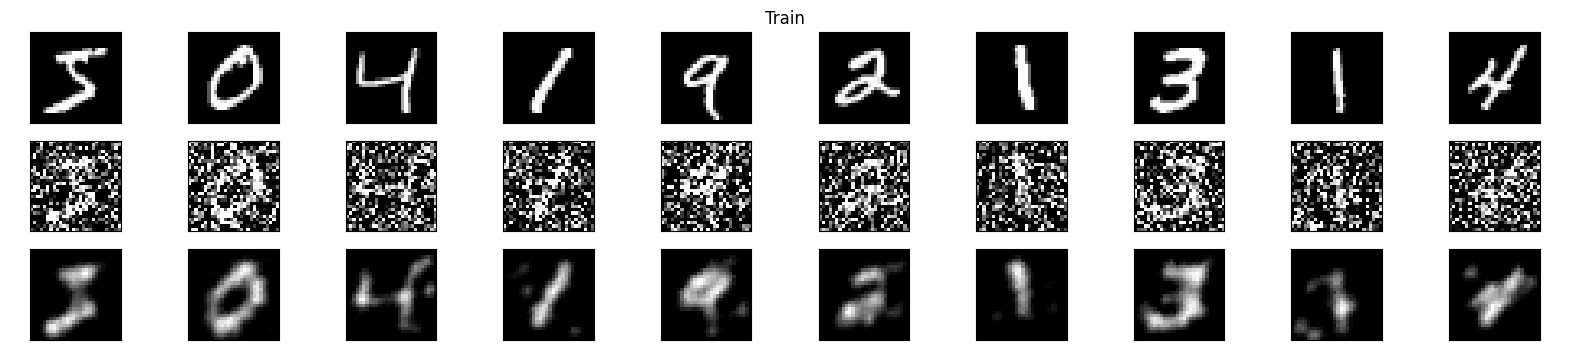

In [30]:
n = 10
decoded_imgs = autoencoder.predict(x_train_noisy[:n])

plt.figure(figsize=(20, 4))
plt.title("Train")
plt.axis('off')
for i in range(10):
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_train[i].reshape(28, 28))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_train_noisy[i].reshape(28, 28))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


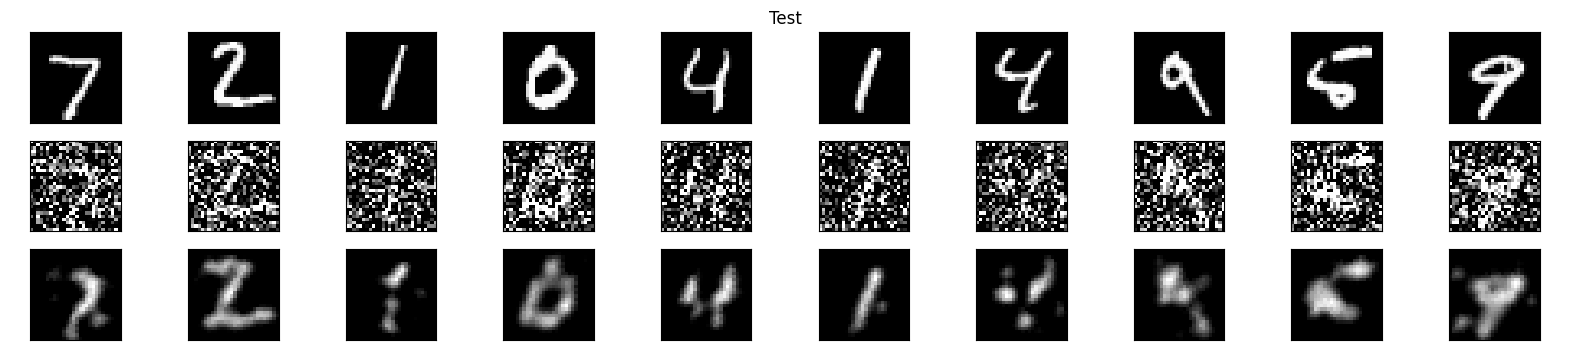

In [31]:
n = 10
decoded_imgs = autoencoder.predict(x_test_noisy[:n])

plt.figure(figsize=(20, 4))
plt.title("Test")
plt.axis('off')
for i in range(10):
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

### Exercise 1

1. Adjust the autoencoder to have **at least 2** other different bottleneck sizes, one larger and one smaller than the given dimensions. In the given example above, this dimension is (None, 4, 4, 8)->4x4x8=128.

2. You may (and should) spend a little time tuning the model hyper-parameters to try to achieve good results on each.

3. Visualize the results of applying each model to some samples from the train and test sets.

4. Write a brief discussion of your results comparing the performance of each model, with justufiction as to **why** you think these results occurred

<span style="font-size: 18px;">
<div class="alert alert-block alert-success">
<b>Comment:</b>
    
Trying to reduce the size of the bottleneck first by adding another convolution layer and a max pooling layer

</div>
</span>

In [32]:
### CODE ....

# reducing the size of the bottleneck
class AutoEncoder(tf.keras.models.Model):
  def __init__(self):
    super(AutoEncoder, self).__init__()
    self.encoder = tf.keras.Sequential([
      tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same'),
      tf.keras.layers.MaxPooling2D((2, 2), padding='same'),
      tf.keras.layers.Conv2D(8, (2, 2), activation='relu', padding='same'),
      tf.keras.layers.MaxPooling2D((2, 2), padding='same'),
      tf.keras.layers.Conv2D(4, (2, 2), activation='relu', padding='same'),
      tf.keras.layers.MaxPooling2D((2, 2), padding='same')
    ])

    self.decoder = tf.keras.Sequential([
      tf.keras.layers.Conv2DTranspose(8,(3,3),strides=(2,2),activation='relu',padding='same'),
      tf.keras.layers.Conv2DTranspose(8,(3,3),strides=(7,7),activation='relu',padding='same'),
      tf.keras.layers.Conv2D(16, (2, 2), strides=(2, 2), activation='relu', padding='same'),
      tf.keras.layers.Conv2D(1,(3,3),strides=(1,1),activation='relu',padding='same'),
      ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

In [33]:
autoencoder = AutoEncoder()

autoencoder.compile(optimizer='adam', loss='mse')

autoencoder.fit(x_train_noisy, x_train,
          epochs=10,
          batch_size=512,
          validation_split=0.8,
          shuffle=True)

Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 124ms/step - loss: 0.1058 - val_loss: 0.0931
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 96ms/step - loss: 0.0934 - val_loss: 0.0893
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 96ms/step - loss: 0.0896 - val_loss: 0.0848
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - loss: 0.0841 - val_loss: 0.0783
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 96ms/step - loss: 0.0772 - val_loss: 0.0727
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 101ms/step - loss: 0.0722 - val_loss: 0.0696
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 98ms/step - loss: 0.0692 - val_loss: 0.0673
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 99ms/step - loss: 0.0669 - val_loss: 0.0650
Epoch 9/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - loss: 0.0643 - val_loss: 0.0626
Epoch 10/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 98ms/step - loss: 0.0622 - val_loss: 0.0605


<span style="font-size: 18px;">
<div class="alert alert-block alert-success">
<b>Comment:</b>
    
The validation loss after reducing the bottleneck size has increased from 0.0369 to 0.0605 during training

</div>
</span>

In [36]:
print(autoencoder.encoder.summary())
print(autoencoder.decoder.summary())

Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_27 (Conv2D)              │ (None, 28, 28, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 14, 14, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 14, 14, 8)      │           520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 7, 7, 8)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 7, 7, 4)        │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 4, 4, 4)        │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 812 (3.17 KB)

 Trainable params: 812 (3.17 KB)

 Non-trainable params: 0 (0.00 B)

None


Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_transpose_18             │ (None, 8, 8, 8)        │           296 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_19             │ (None, 56, 56, 8)      │           584 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_30 (Conv2D)              │ (None, 28, 28, 16)     │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 28, 28, 1)      │           145 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,553 (6.07 KB)

 Trainable params: 1,553 (6.07 KB)

 Non-trainable params: 0 (0.00 B)

None


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


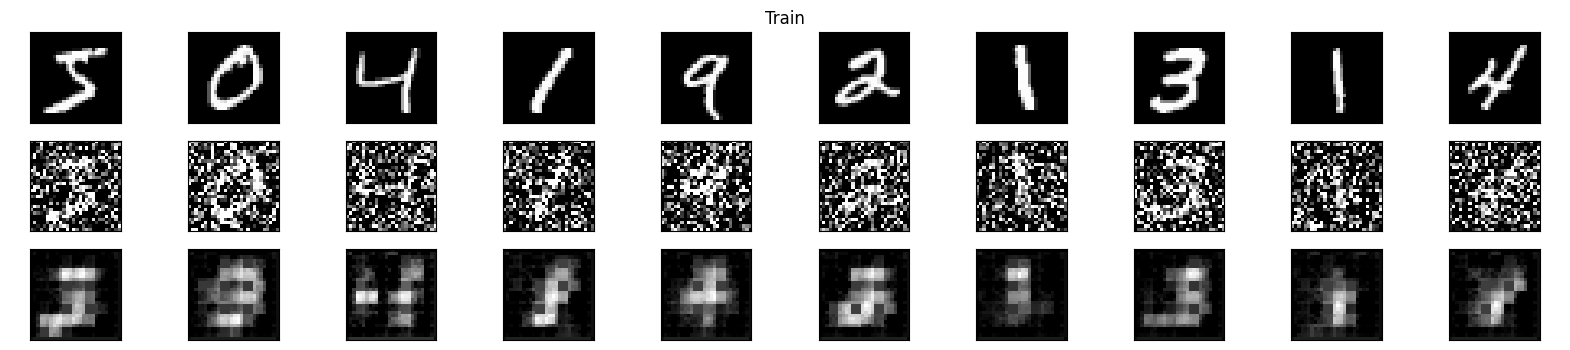

In [38]:
# plotting the train image data
n = 10
decoded_imgs = autoencoder.predict(x_train_noisy[:n])

plt.figure(figsize=(20, 4))
plt.title("Train")
plt.axis('off')
for i in range(10):
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_train[i].reshape(28, 28))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_train_noisy[i].reshape(28, 28))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


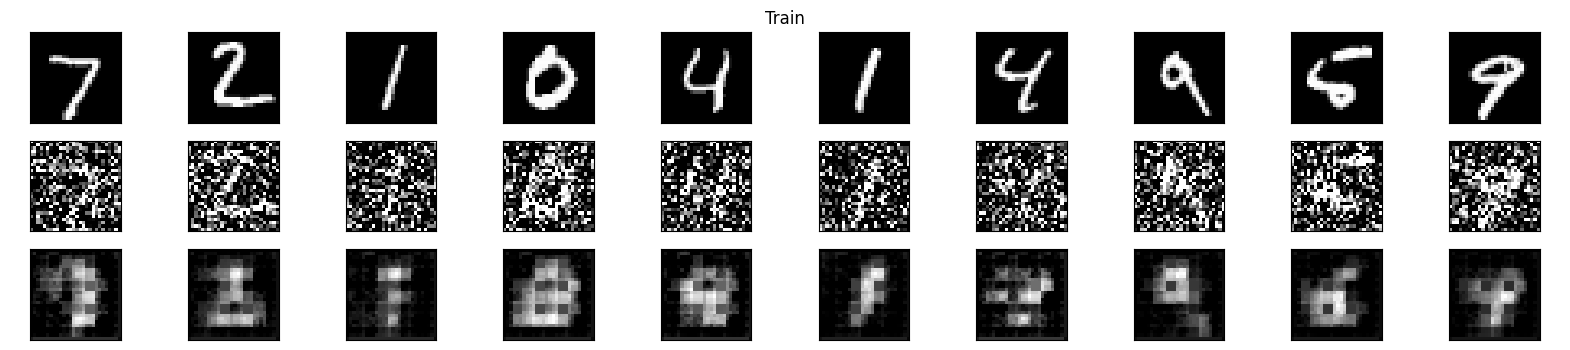

In [39]:
# plotting the test image data
n = 10
decoded_imgs = autoencoder.predict(x_test_noisy[:n])

plt.figure(figsize=(20, 4))
plt.title("Train")
plt.axis('off')
for i in range(10):
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

<span style="font-size: 18px;">
<div class="alert alert-block alert-success">
<b>Comment:</b>
    
Increasing the bottleneck size by removing the last maxPooling layer from the encoder model. I have also increased the number
of filters in the 2nd convolution layer of the encoder model so that it can capture more features

Since, one max pooling layer was removed from the encoder, I have reduced the strides of the first covolution transpose layer from (2,2) to (1,1) in the decoder. This is done to match the output shape of (28, 28, 1)
</div>
</span>

In [41]:
# increasing the size of the bottleneck
class AutoEncoder(tf.keras.models.Model):
  def __init__(self):
    super(AutoEncoder, self).__init__()
    self.encoder = tf.keras.Sequential([
      tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same'),
      tf.keras.layers.MaxPooling2D((2, 2), padding='same'),
      tf.keras.layers.Conv2D(16, (2, 2), activation='relu', padding='same')
      # tf.keras.layers.MaxPooling2D((2, 2), padding='same')
    ])

    self.decoder = tf.keras.Sequential([
      tf.keras.layers.Conv2DTranspose(8,(3,3),strides=(1,1),activation='relu',padding='same'),
      tf.keras.layers.Conv2DTranspose(8,(3,3),strides=(2,2),activation='relu',padding='same'),
       tf.keras.layers.Conv2D(1,(3,3),strides=(1,1),activation='relu',padding='same'),
      ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

In [42]:
autoencoder = AutoEncoder()

autoencoder.compile(optimizer='adam', loss='mse')

autoencoder.fit(x_train_noisy, x_train,
          epochs=10,
          batch_size=512,
          validation_split=0.8,
          shuffle=True)

Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 92ms/step - loss: 0.1052 - val_loss: 0.0916
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.0862 - val_loss: 0.0692
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 0.0626 - val_loss: 0.0406
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.0379 - val_loss: 0.0346
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.0333 - val_loss: 0.0326
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - loss: 0.0320 - val_loss: 0.0317
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.0313 - val_loss: 0.0312
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0309 - val_loss: 0.0308
Epoch 9/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0305 - val_loss: 0.0305
Epoch 10/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.0300 - val_loss: 0.0303


<span style="font-size: 18px;">
<div class="alert alert-block alert-success">
<b>Comment:</b>

The validation loss has decreased to 0.0303
</div>
</span>

In [43]:
print(autoencoder.encoder.summary())
print(autoencoder.decoder.summary())

Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_32 (Conv2D)              │ (None, 28, 28, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 14, 14, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_33 (Conv2D)              │ (None, 14, 14, 16)     │         1,040 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,200 (4.69 KB)

 Trainable params: 1,200 (4.69 KB)

 Non-trainable params: 0 (0.00 B)

None


Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_transpose_20             │ (None, 14, 14, 8)      │         1,160 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_21             │ (None, 28, 28, 8)      │           584 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_34 (Conv2D)              │ (None, 28, 28, 1)      │            73 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,817 (7.10 KB)

 Trainable params: 1,817 (7.10 KB)

 Non-trainable params: 0 (0.00 B)

None


In [45]:
print(x_train_noisy.shape)
print(x_train.shape)

(60000, 28, 28, 1)
(60000, 28, 28, 1)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


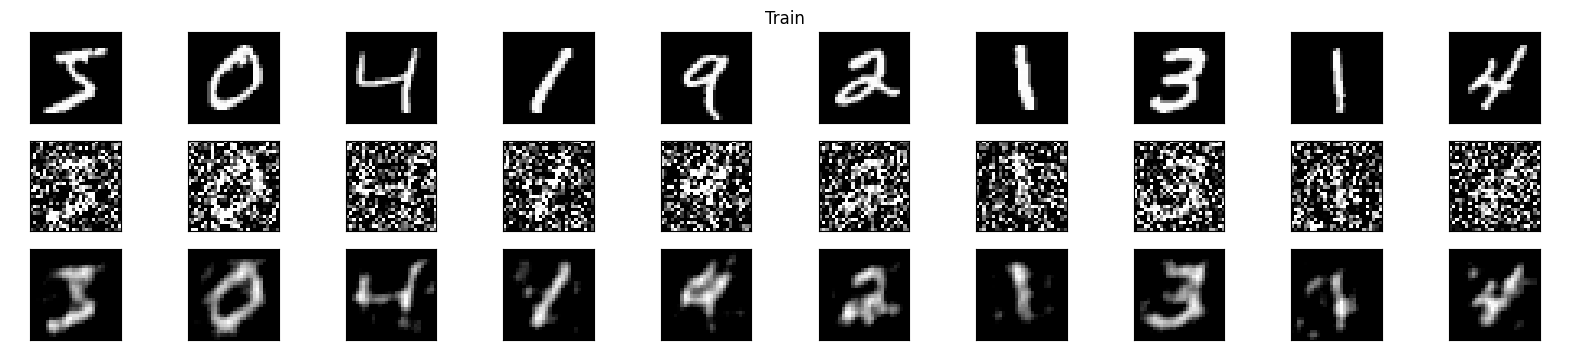

In [48]:
n = 10
decoded_imgs = autoencoder.predict(x_train_noisy[:n])

plt.figure(figsize=(20, 4))
plt.title("Train")
plt.axis('off')
for i in range(10):
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_train[i].reshape(28, 28))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_train_noisy[i].reshape(28, 28))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


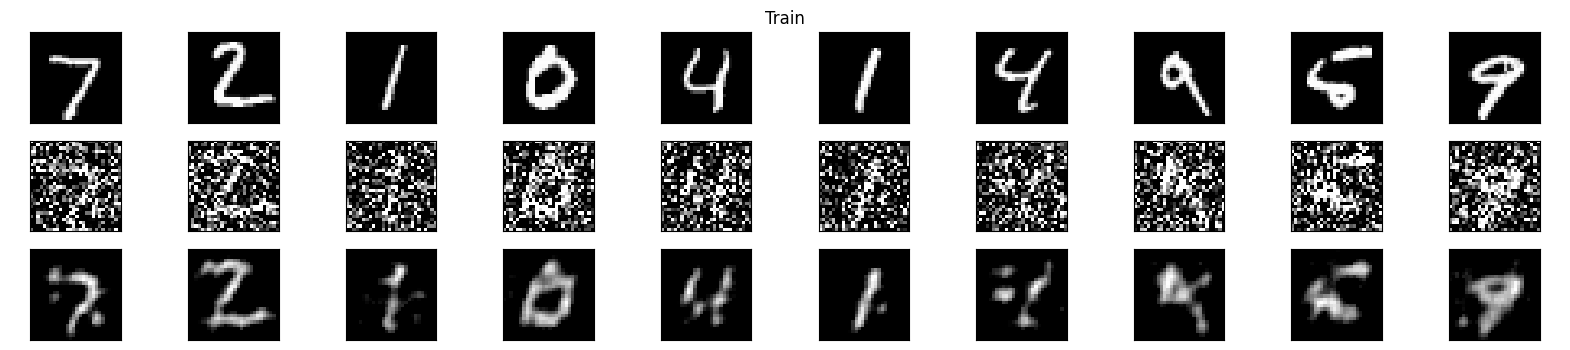

In [49]:
n = 10
decoded_imgs = autoencoder.predict(x_test_noisy[:n])

plt.figure(figsize=(20, 4))
plt.title("Train")
plt.axis('off')
for i in range(10):
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

<span style="font-size: 18px;">
<div class="alert alert-block alert-success">
<b>Comment:</b>

The decoded images obtained from the model after increasing the batch size are much clearer than the previous model's output. However, the decoded images are still quite noisy. Now, I am trying to increase the number of filters in the encoder and decoder model, and increase the amount of training data by reducing the validation_split value to 0.2 to get a better training result. Additionaly, I have also increased the number of epochs to give the model more chance to train.

</div>
</span>

In [50]:
# increasing the size of the bottleneck
class AutoEncoder(tf.keras.models.Model):
  def __init__(self):
    super(AutoEncoder, self).__init__()
    self.encoder = tf.keras.Sequential([
      tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
      tf.keras.layers.MaxPooling2D((2, 2), padding='same'),
      tf.keras.layers.Conv2D(16, (2, 2), activation='relu', padding='same')
      # tf.keras.layers.MaxPooling2D((2, 2), padding='same')
    ])

    self.decoder = tf.keras.Sequential([
      tf.keras.layers.Conv2DTranspose(16,(3,3),strides=(1,1),activation='relu',padding='same'),
      tf.keras.layers.Conv2DTranspose(32,(3,3),strides=(2,2),activation='relu',padding='same'),
       tf.keras.layers.Conv2D(1,(3,3),strides=(1,1),activation='relu',padding='same'),
      ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

In [52]:
autoencoder = AutoEncoder()

autoencoder.compile(optimizer='adam', loss='mse')

autoencoder.fit(x_train_noisy, x_train,
          epochs=20,
          batch_size=512,
          validation_split=0.2,
          shuffle=True)

Epoch 1/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 6s 49ms/step - loss: 0.0747 - val_loss: 0.0320
Epoch 2/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 0.0308 - val_loss: 0.0293
Epoch 3/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 0.0288 - val_loss: 0.0286
Epoch 4/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - loss: 0.0278 - val_loss: 0.0273
Epoch 5/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 0.0270 - val_loss: 0.0267
Epoch 6/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 0.0265 - val_loss: 0.0262
Epoch 7/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 0.0261 - val_loss: 0.0262
Epoch 8/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 0.0257 - val_loss: 0.0260
Epoch 9/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 0.0255 - val_loss: 0.0254
Epoch 10/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - loss: 0.0253 - val_loss: 0.0254
Epoch 11/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 0.0250 - val_loss: 0.0251
Epoch 12/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 0.0

In [56]:
print(autoencoder.encoder.summary())
print(autoencoder.decoder.summary())

Model: "sequential_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_38 (Conv2D)              │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_39 (Conv2D)              │ (None, 14, 14, 16)     │         2,064 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,384 (9.31 KB)

 Trainable params: 2,384 (9.31 KB)

 Non-trainable params: 0 (0.00 B)

None


Model: "sequential_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_transpose_24             │ (None, 14, 14, 16)     │         2,320 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_25             │ (None, 28, 28, 32)     │         4,640 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_40 (Conv2D)              │ (None, 28, 28, 1)      │           289 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,249 (28.32 KB)

 Trainable params: 7,249 (28.32 KB)

 Non-trainable params: 0 (0.00 B)

None


<span style="font-size: 18px;">
<div class="alert alert-block alert-success">
<b>Comment:</b>

The validation loss has decreased further to 0.0242. Now, I have trained the model on the full dataset and then printed the denoised train and test images.

</div>
</span>

In [53]:
# removed the validation_split argument to use the entire training dataset for training
autoencoder.fit(x_train_noisy, x_train,
          epochs=20,
          batch_size=512,
          shuffle=True)

Epoch 1/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - loss: 0.0240
Epoch 2/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - loss: 0.0240
Epoch 3/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - loss: 0.0238
Epoch 4/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - loss: 0.0237
Epoch 5/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - loss: 0.0236
Epoch 6/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - loss: 0.0236
Epoch 7/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - loss: 0.0235
Epoch 8/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - loss: 0.0234
Epoch 9/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - loss: 0.0234
Epoch 10/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - loss: 0.0234
Epoch 11/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - loss: 0.0233
Epoch 12/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - loss: 0.0233
Epoch 13/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - loss: 0.0232
Epoch 14/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - loss: 0.0233
Epoch 15/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 5s

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


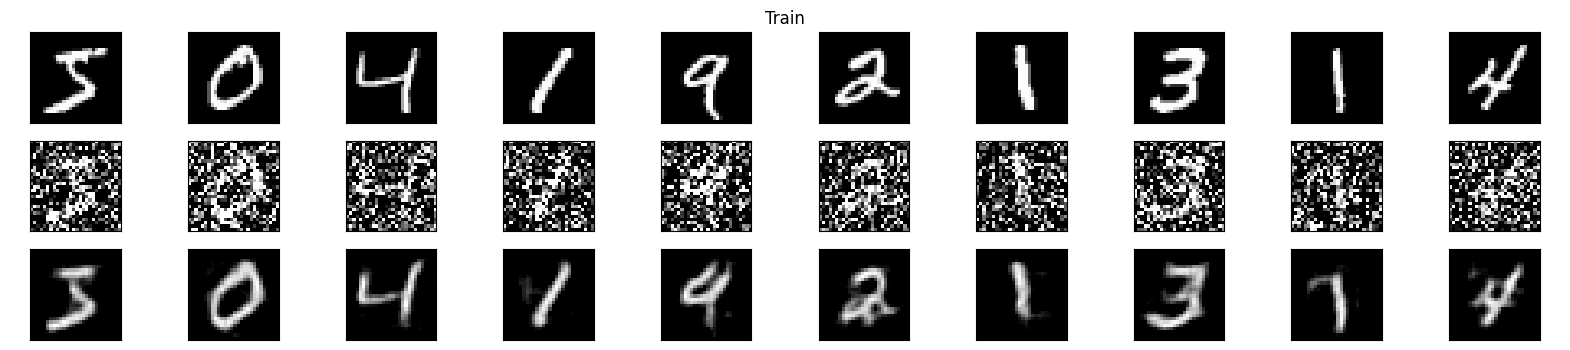

In [54]:
n = 10
decoded_imgs = autoencoder.predict(x_train_noisy[:n])

plt.figure(figsize=(20, 4))
plt.title("Train")
plt.axis('off')
for i in range(10):
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_train[i].reshape(28, 28))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_train_noisy[i].reshape(28, 28))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


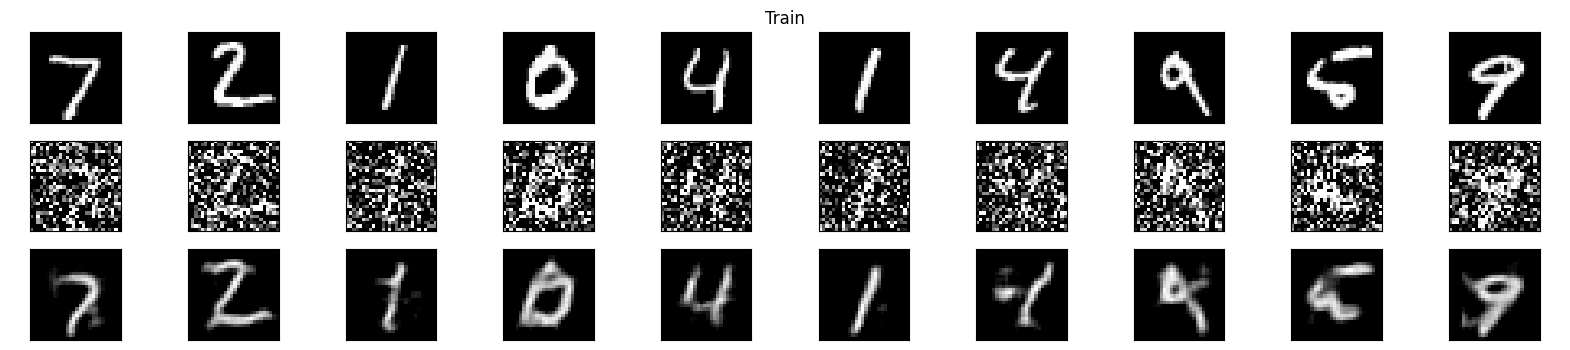

In [55]:
n = 10
decoded_imgs = autoencoder.predict(x_test_noisy[:n])

plt.figure(figsize=(20, 4))
plt.title("Train")
plt.axis('off')
for i in range(10):
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

### FINAL EXPLANATION
<span style="font-size: 18px;">
<div class="alert alert-block alert-success">

The second model which has a larger bottleneck of (14, 14, 16) dimensions [14 x 14 size with 16 filters] performs better than the model with a smaller bottleneck of (4, 4, 4) layer in the encoder. 

This is because with a smaller bottleneck the model is unable to capture the finer features of the images. It is compressing the image to a lower dimension too much. As a result, only the more dominant features like the overall shape of the numbers and the area that they cover is captured. It has removed the noise to a certain degree but also failed to capture finer features. 

The second and the third model, with a wider bottleneck, has captured more detailed features of the images and removed the noise as well. In this set of models, the third model is even better than the second one because it has more kernels in the encoder and decoder sub-models. With more kernels, it's able to capture more features. Furthermore, it has been given more training data as the validation split has been reduced to 0.2 and the number of epochs have increased to 20. Higher number of epochs gives the model more chance to reduce its error.

In conclusion, the bottleneck size cause a trade-off of underfitting and overfitting. Too small a bottleneck can cause the model to not learn enough features to decode images properly, and too big a bottleneck can cause the model to learn the noise as well (overfitting).

</div>
</span>

## Task 2

For the second task, you must implement a de-noising autoencoder from scratch on a more real-world dataset.

In [2]:
!wget https://github.com/gmprovan/CS6421-Assignment1/raw/master/train.zip
!wget https://github.com/gmprovan/CS6421-Assignment1/raw/master/test.zip
!wget https://github.com/gmprovan/CS6421-Assignment1/raw/master/train_cleaned.zip
!unzip train.zip
!unzip test.zip
!unzip train_cleaned.zip

--2025-03-23 15:50:40--  https://github.com/gmprovan/CS6421-Assignment1/raw/master/train.zip
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/gmprovan/CS6421-Assignment1/master/train.zip [following]
--2025-03-23 15:50:41--  https://raw.githubusercontent.com/gmprovan/CS6421-Assignment1/master/train.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19407030 (19M) [application/zip]
Saving to: ‘train.zip’

train.zip           100%[===================>]  18.51M  34.6MB/s    in 0.5s    

2025-03-23 15:50:42 (34.6 MB/s) - ‘train.zip’ saved [19407030/19407030]

--2025-03-23 15:50:42--  https://github

In [106]:
from tensorflow.keras.preprocessing.image import load_img, array_to_img, img_to_array
import os
from sklearn.model_selection import train_test_split

X = []
Y = []

for img in os.listdir("train"):
    img = tf.keras.utils.load_img(f"train/{img}",color_mode="grayscale",target_size=(420,540))
    img = img_to_array(img).astype('float32')/255.
    X.append(img)

for img in os.listdir("train_cleaned"):
    img = load_img(f"train_cleaned/{img}",color_mode="grayscale",target_size=(420,540))
    img = img_to_array(img).astype('float32')/255.
    Y.append(img)


X = np.array(X)
Y = np.array(Y)
print(X.shape)
print(Y.shape)

x_train, x_valid, y_train, y_valid = train_test_split(X, Y, test_size=0.1, random_state=111)

X = []

for img in os.listdir("test"):
    img = tf.keras.utils.load_img(f"test/{img}",color_mode="grayscale",target_size=(420,540))
    img = img_to_array(img).astype('float32')/255.
    X.append(img)

x_test = np.array(X)

(144, 420, 540, 1)
(144, 420, 540, 1)


In [105]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_valid.shape)

(129, 420, 540, 1)
(72, 420, 540, 1)
(129, 420, 540, 1)
(15, 420, 540, 1)


This dataset consists of scans of text documents that contain noise and artificats.

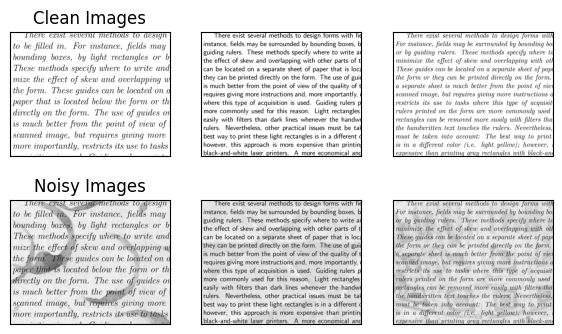

In [4]:
n = 3
plt.figure(figsize=(7, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(y_train[i].reshape(420, 540))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == 0:
      ax.set_title('Clean Images')
for i in range(n):
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(x_train[i].reshape(420, 540))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == 0:
        ax.set_title('Noisy Images')

plt.show()


## Exercise 2

1. Implement a denoising CNN autoencoder on this data, observing that the size of your images are now  (420, 540, 1). Use MSE loss. These models will take longer to train, to try to start from what you expect to be a good starting set of hyper-parametrers. Try to make the bottleneck as small as possible.
2. Visualise the results of applying this autoencoder on the train and test data for different autoencoder sizes - focusing particularly on the bottleneck size.
3. A small number of marks are available for implementing the correct regularization on this model
4. Discuss and explain the performances of differnt models and bottleneck sizes similarly to task 1.

In [ ]:
# adding a dummy sequential model just to visual the layer output shapes without compiling it since it has an 
# input layer defined
view_mod = tf.keras.Sequential([
      tf.keras.layers.Input(shape=(420,540, 1)),
      tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same'),
      tf.keras.layers.MaxPooling2D((2, 2), padding='same'),
      tf.keras.layers.Conv2D(16, (2, 2), activation='relu', padding='same'),
      tf.keras.layers.MaxPooling2D((2, 2), padding='same'),
      tf.keras.layers.Conv2DTranspose(8,(3,3),strides=(2,2),activation='relu',padding='same'),
      tf.keras.layers.Conv2DTranspose(8,(3,3),strides=(2,2),activation='relu',padding='same'),
      tf.keras.layers.Conv2D(1,(3,3),strides=(1,1),activation='relu',padding='same'),
    ])
view_mod.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 420, 540, 16)        │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 210, 270, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 210, 270, 16)        │           1,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 105, 135, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_4 (Conv2DTranspose) │ (None, 210, 270, 8)         │           1,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_5 (Conv2DTranspose) │ (None, 420, 540, 8)         │             584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 420, 540, 1)         │              73 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,017 (11.79 KB)

 Trainable params: 3,017 (11.79 KB)

 Non-trainable params: 0 (0.00 B)

<span style="font-size: 18px;">
<div class="alert alert-block alert-success">
<b>Comment:</b>
    
Starting with a model where the bottleneck size is aroung half of the input shape. I have used batch_size as 4 while training the model because there are only 129 images in the training dataset. A small batch size will ensure more gradient updates per epoch and reduce memory consumption as well.

</div>
</span>

In [69]:
class AutoEncoder(tf.keras.models.Model):
  def __init__(self):
    super(AutoEncoder, self).__init__()
    self.encoder = tf.keras.Sequential([
      tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same'),
      tf.keras.layers.MaxPooling2D((2, 2), padding='same'),
      tf.keras.layers.Conv2D(16, (2, 2), activation='relu', padding='same'),
      tf.keras.layers.MaxPooling2D((2, 2), padding='same')
    ])

    self.decoder = tf.keras.Sequential([
      tf.keras.layers.Conv2DTranspose(8,(3,3),strides=(2,2),activation='relu',padding='same'),
      tf.keras.layers.Conv2DTranspose(8,(3,3),strides=(2,2),activation='relu',padding='same'),
      tf.keras.layers.Conv2D(1,(3,3),strides=(1,1),activation='relu',padding='same'),
      ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

In [70]:
autoencoder_2 = AutoEncoder()

autoencoder_2.compile(optimizer='adam', loss='mse')

autoencoder_2.fit(x_train, y_train,
          epochs=10,
          batch_size=4,
          validation_split=0.2,
          shuffle=True)

Epoch 1/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 97ms/step - loss: 0.6297 - val_loss: 0.1274
Epoch 2/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step - loss: 0.1176 - val_loss: 0.0761
Epoch 3/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - loss: 0.0750 - val_loss: 0.0690
Epoch 4/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - loss: 0.0693 - val_loss: 0.0660
Epoch 5/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step - loss: 0.0649 - val_loss: 0.0613
Epoch 6/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step - loss: 0.0598 - val_loss: 0.0564
Epoch 7/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step - loss: 0.0548 - val_loss: 0.0513
Epoch 8/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - loss: 0.0510 - val_loss: 0.0494
Epoch 9/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - loss: 0.0487 - val_loss: 0.0478
Epoch 10/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - loss: 0.0471 - val_loss: 0.0458


In [71]:
# adding a function to plot the images
def plot_images(clean_data, noisy_data, predicted_data):
  plt.figure(figsize=(20, 10))
  n = len(clean_data)
  for i, img in enumerate(clean_data):
      ax = plt.subplot(3, n, i + 1)
      plt.imshow(img.reshape(420, 540))
      plt.gray()
      ax.get_xaxis().set_visible(False)
      ax.get_yaxis().set_visible(False)
      if i == 0:
        ax.set_title('Clean Images')
  for i, img in enumerate(noisy_data):
      ax = plt.subplot(3, n, i + 1 + n)
      plt.imshow(img.reshape(420, 540))
      plt.gray()
      ax.get_xaxis().set_visible(False)
      ax.get_yaxis().set_visible(False)
      if i == 0:
          ax.set_title('Noisy Images')
  for i, img in enumerate(predicted_data):
      ax = plt.subplot(3, n, i + 1 + 2*n)
      plt.imshow(img.reshape(420, 540))
      plt.gray()
      ax.get_xaxis().set_visible(False)
      ax.get_yaxis().set_visible(False)
      if i == 0:
          ax.set_title('De-noised Images')

  plt.show()


In [72]:
train_predictions = autoencoder_2.predict(x_train[5:8])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


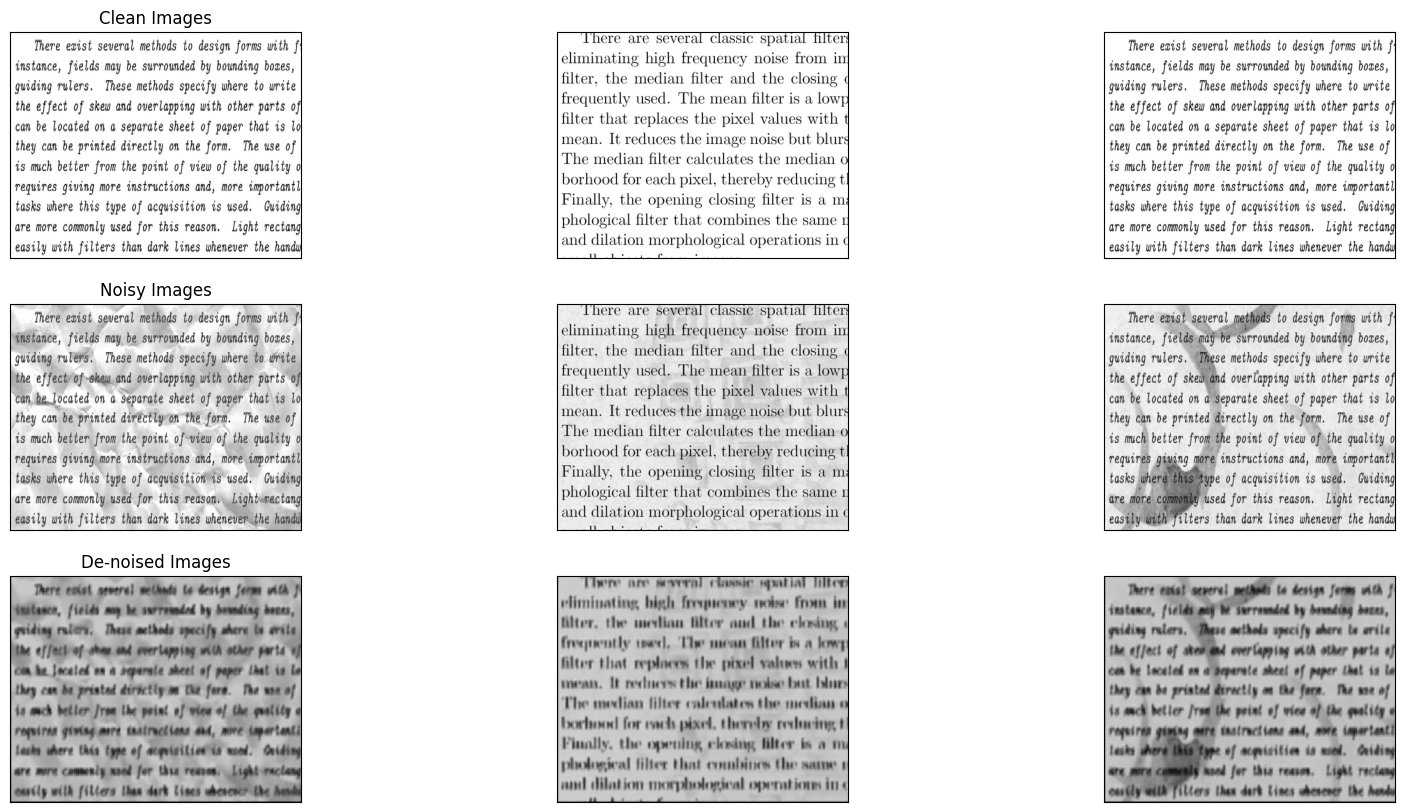

In [73]:
# plotting the clean, noisy, and de-noised images
plot_images(y_train[5:8], x_train[5:8], train_predictions)

<span style="font-size: 18px;">
<div class="alert alert-block alert-success">
<b>Comment:</b>

In the above cell, I am comparing the de-noised images against the clean and noisy images. With a small bottleneck the model is not learning finer features and is only learning the dominant ones because of a strong compression, similar to what happened in question 1.
In the next model run, I have removed the last MaxPooling layer from the Encoder model to increase the bottlneck size. Furthermore, the number of training epochs have also been increased from 10 to 20 to give the model more time to train.

</div>
</span>

In [74]:
view_mod = tf.keras.Sequential([
      tf.keras.layers.Input(shape=(420,540, 1)),
      tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same'),
      tf.keras.layers.MaxPooling2D((2, 2), padding='same'),
      tf.keras.layers.Conv2D(16, (2, 2), activation='relu', padding='same'),
      # tf.keras.layers.MaxPooling2D((2, 2), padding='same'),
      tf.keras.layers.Conv2DTranspose(8,(3,3),strides=(1,1),activation='relu',padding='same'),
      tf.keras.layers.Conv2DTranspose(8,(3,3),strides=(2,2),activation='relu',padding='same'),
      tf.keras.layers.Conv2D(1,(3,3),strides=(1,1),activation='relu',padding='same'),
    ])
view_mod.summary()

Model: "sequential_36"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_56 (Conv2D)              │ (None, 420, 540, 16)   │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 210, 270, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_57 (Conv2D)              │ (None, 210, 270, 16)   │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_36             │ (None, 210, 270, 8)    │         1,160 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_37             │ (None, 420, 540, 8)    │           584 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_58 (Conv2D)              │ (None, 420, 540, 1)    │            73 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,017 (11.79 KB)

 Trainable params: 3,017 (11.79 KB)

 Non-trainable params: 0 (0.00 B)

In [75]:
# changing the autoencoder. Increasing the number of epochs since the batch size is low and it gives us more 
# chance to reduce the loss.
class AutoEncoder(tf.keras.models.Model):
  def __init__(self):
    super(AutoEncoder, self).__init__()
    self.encoder = tf.keras.Sequential([
      tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same'),
      tf.keras.layers.MaxPooling2D((2, 2), padding='same'),
      tf.keras.layers.Conv2D(16, (2, 2), activation='relu', padding='same'),
      # tf.keras.layers.MaxPooling2D((2, 2), padding='same')
    ])

    self.decoder = tf.keras.Sequential([
      tf.keras.layers.Conv2DTranspose(8,(3,3),strides=(1,1),activation='relu',padding='same'),
      tf.keras.layers.Conv2DTranspose(8,(3,3),strides=(2,2),activation='relu',padding='same'),
      tf.keras.layers.Conv2D(1,(3,3),strides=(1,1),activation='relu',padding='same'),
      ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder_2 = AutoEncoder()

autoencoder_2.compile(optimizer='adam', loss='mse')

autoencoder_2.fit(x_train, y_train,
          epochs=20,
          batch_size=4,
          validation_split=0.2,
          shuffle=True)

Epoch 1/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 90ms/step - loss: 0.6228 - val_loss: 0.2817
Epoch 2/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - loss: 0.2733 - val_loss: 0.2659
Epoch 3/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - loss: 0.2199 - val_loss: 0.0682
Epoch 4/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - loss: 0.0675 - val_loss: 0.0572
Epoch 5/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step - loss: 0.0543 - val_loss: 0.0458
Epoch 6/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step - loss: 0.0434 - val_loss: 0.0359
Epoch 7/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step - loss: 0.0346 - val_loss: 0.0302
Epoch 8/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step - loss: 0.0285 - val_loss: 0.0279
Epoch 9/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - loss: 0.0272 - val_loss: 0.0253
Epoch 10/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - loss: 0.0243 - val_loss: 0.0239
Epoch 11/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - loss: 0.0223 - val_loss: 0.0212
Epoch 12/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - loss: 0.0

In [76]:
train_predictions = autoencoder_2.predict(x_train[5:8])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


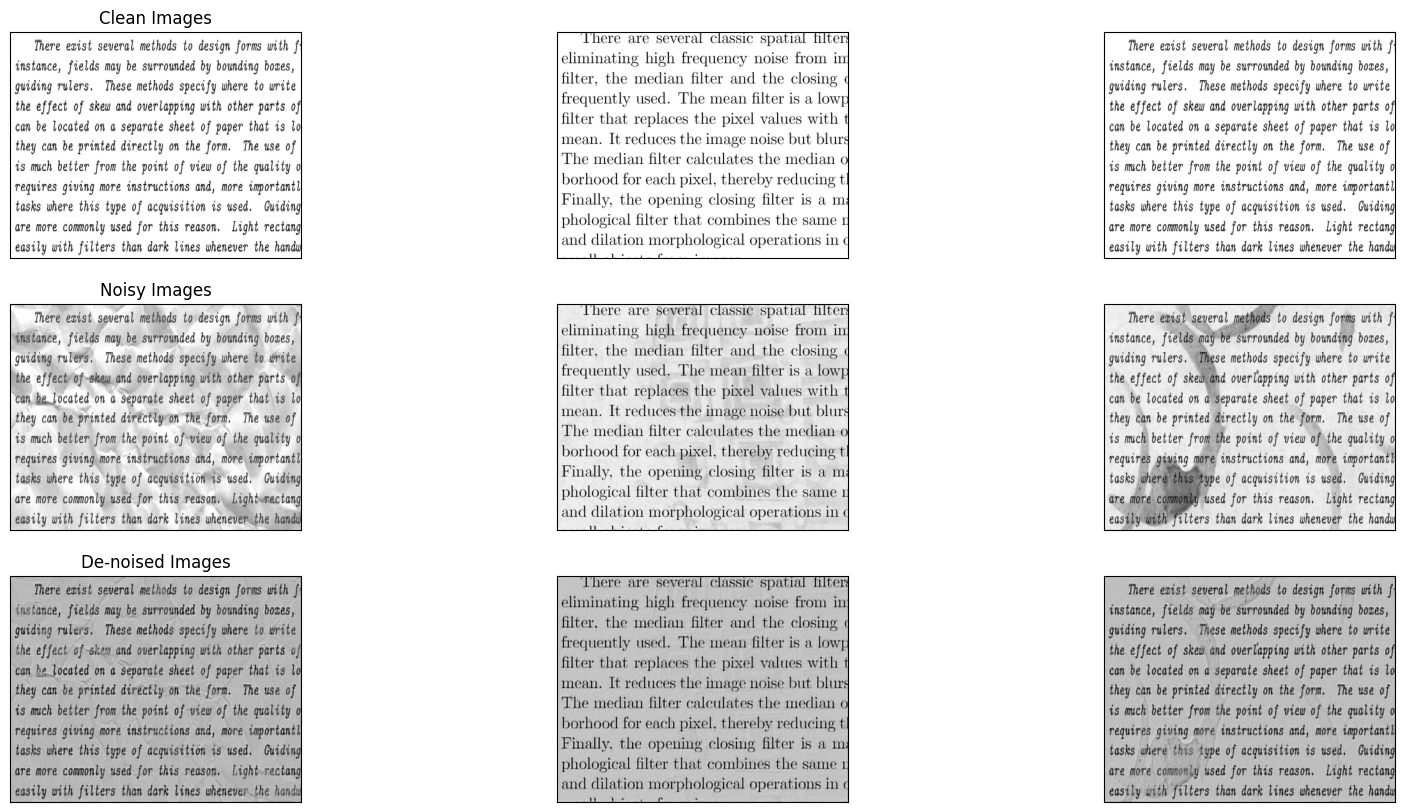

In [77]:
plot_images(clean_data=y_train[5:8], noisy_data=x_train[5:8], predicted_data=train_predictions)

<span style="font-size: 18px;">
<div class="alert alert-block alert-success">
<b>Comment:</b>

The above model has a lower loss than the previous one with a smaller bottleneck. The validation loss decreased from <b>0.0458</b> to <b>0.0120</b>. The de-noised images are also clearer and have much less noise in them. However, they still have some noise in them and their background isn't white like the clean images either. 

</div>
</span>

<span style="font-size: 18px;">
<div class="alert alert-block alert-success">
<b>Comment:</b>

In the next model below, I have increased the number of filters in the first layer of the encoder and both layers of the decoder so that the model can learn finer features - the textual part -  and restore them during decoding. 

</div>
</span>

In [78]:
view_mod = tf.keras.Sequential([
      tf.keras.layers.Input(shape=(420,540, 1)),
      tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
      tf.keras.layers.MaxPooling2D((2, 2), padding='same'),
      tf.keras.layers.Conv2D(16, (2, 2), activation='relu', padding='same'),
      # tf.keras.layers.MaxPooling2D((2, 2), padding='same'),
      tf.keras.layers.Conv2DTranspose(16,(3,3),strides=(1,1),activation='relu',padding='same'),
      tf.keras.layers.Conv2DTranspose(32,(3,3),strides=(2,2),activation='relu',padding='same'),
      tf.keras.layers.Conv2D(1,(3,3),strides=(1,1),activation='relu',padding='same'),
    ])
view_mod.summary()

Model: "sequential_39"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_62 (Conv2D)              │ (None, 420, 540, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 210, 270, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_63 (Conv2D)              │ (None, 210, 270, 16)   │         2,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_40             │ (None, 210, 270, 16)   │         2,320 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_41             │ (None, 420, 540, 32)   │         4,640 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_64 (Conv2D)              │ (None, 420, 540, 1)    │           289 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,633 (37.63 KB)

 Trainable params: 9,633 (37.63 KB)

 Non-trainable params: 0 (0.00 B)

In [79]:
'''changing the autoencoder. Increasing the number of filters in the encoder and decoder so that I can try and capture
finer features - more textual part - of the noisy immages'''

class AutoEncoder(tf.keras.models.Model):
  def __init__(self):
    super(AutoEncoder, self).__init__()
    self.encoder = tf.keras.Sequential([
      tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
      tf.keras.layers.MaxPooling2D((2, 2), padding='same'),
      tf.keras.layers.Conv2D(16, (2, 2), activation='relu', padding='same'),
    ])

    self.decoder = tf.keras.Sequential([
      tf.keras.layers.Conv2DTranspose(16,(3,3),strides=(1,1),activation='relu',padding='same'),
      tf.keras.layers.Conv2DTranspose(32,(3,3),strides=(2,2),activation='relu',padding='same'),
      tf.keras.layers.Conv2D(1,(3,3),strides=(1,1),activation='relu',padding='same'),
      ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder_2 = AutoEncoder()

autoencoder_2.compile(optimizer='adam', loss='mse')



autoencoder_2.fit(x_train, y_train,
          epochs=20,
          batch_size=4,
          validation_split=0.2,
          shuffle=True)

Epoch 1/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 8s 235ms/step - loss: 0.4105 - val_loss: 0.0849
Epoch 2/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 206ms/step - loss: 0.0727 - val_loss: 0.0537
Epoch 3/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 205ms/step - loss: 0.0504 - val_loss: 0.0389
Epoch 4/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 202ms/step - loss: 0.0357 - val_loss: 0.0315
Epoch 5/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 207ms/step - loss: 0.0283 - val_loss: 0.0243
Epoch 6/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 212ms/step - loss: 0.0224 - val_loss: 0.0187
Epoch 7/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 213ms/step - loss: 0.0172 - val_loss: 0.0153
Epoch 8/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 208ms/step - loss: 0.0139 - val_loss: 0.0141
Epoch 9/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 211ms/step - loss: 0.0127 - val_loss: 0.0117
Epoch 10/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 205ms/step - loss: 0.0113 - val_loss: 0.0103
Epoch 11/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 204ms/step - loss: 0.0093 - val_loss: 0.0095
Epoch 12/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 209ms/step

In [80]:
# loss has decreased from the previous run!
train_predictions = autoencoder_2.predict(x_train[5:8])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


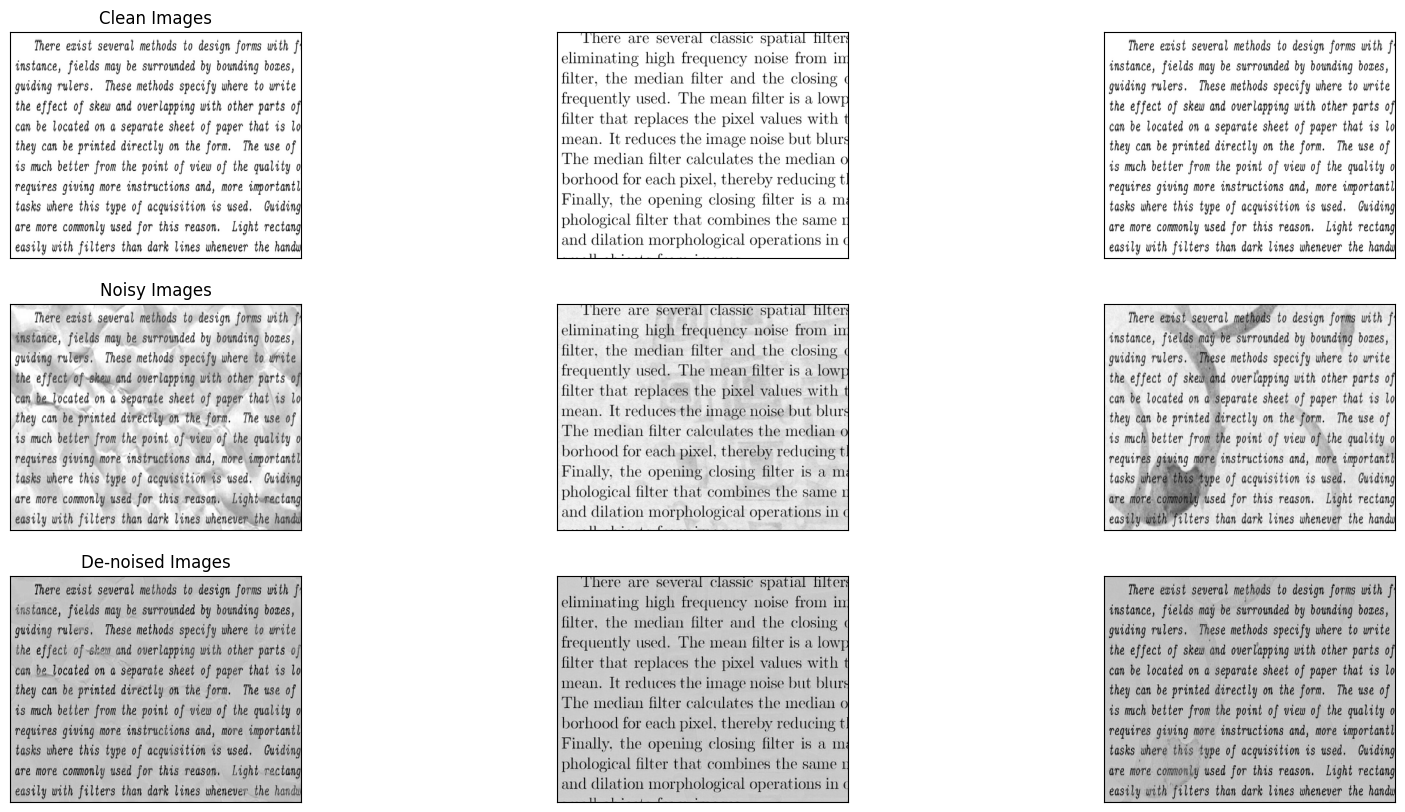

In [81]:
plot_images(clean_data=y_train[5:8], noisy_data=x_train[5:8], predicted_data=train_predictions)

<span style="font-size: 18px;">
<div class="alert alert-block alert-success">
<b>Comment:</b>

The validation error of the above model has decreased from <b>0.0120</b> to <b>0.0048</b>. The noise in the predicted images is also less. The stain in the righmost de-noised image is lighter than the one in the previous model.
    
</div>
</span>

In [ ]:
!pip install keras_tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 6.0 MB/s eta 0:00:00


<span style="font-size: 18px;">
<div class="alert alert-block alert-success">
<b>Comment:</b>

To test the addition of few hyper-parameters like L1/L2 regularization, ReLu/ELu activation, batchnorm, and dropout, I have used the keras_tuner package. I am creating the AutoEncoder model inside the tuning function.
In the model_builder function, I have added kernel_regularization to penalize the parameters so that the model does not overfit, i.e., learn the noise. However, I have only added it to the first layer of the encoder and the decoder sub-model because I don't want the weights to get over penalized. I have kept rate is quite less as well.

I have also added batch normalization layer at the end of the encoder and the decoder. And there's a dropout layer before the output layer to create a more robust model.
    
</div>
</span>

In [82]:
import keras_tuner as kt
'''modifying the AutoEncoder class's constructor to accept encoder and decoder models rather than create one so 
that I can tune them in the hyper-parameter tuning function'''
class AutoEncoder(tf.keras.models.Model):
  def __init__(self, encoder, decoder):
    super(AutoEncoder, self).__init__()
    self.encoder = encoder

    self.decoder = decoder

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

In [ ]:
def model_builder(hp):
  activation = hp.Choice('activation', ['relu', 'elu'])
  reg_type = hp.Choice('regularization', ['l1', 'l2'])
  reg_intensity = hp.Float('reg_factor', min_value=1e-8, max_value=1e-6, sampling='log')
  dropout_rate = hp.Float('dropout', 0.2, 0.5, step=0.1)
  use_batchnorm = hp.Boolean('batchnorm')

  if reg_type == 'l1':
    reg = tf.keras.regularizers.L1(reg_intensity)
  elif reg_type == 'l2':
    reg = tf.keras.regularizers.L2(reg_intensity)
  elif reg_type == 'l1_l2':
    reg = tf.keras.regularizers.L1L2(l1=reg_intensity, l2=reg_intensity)

  encoder = tf.keras.Sequential()
  encoder.add(tf.keras.layers.Conv2D(32, (3, 3), activation=activation, padding='same', kernel_regularizer=reg))
  encoder.add(tf.keras.layers.MaxPooling2D((2, 2), padding='same'))
  encoder.add(tf.keras.layers.Conv2D(16, (2, 2), activation=activation, padding='same'))

  if use_batchnorm:
    encoder.add(tf.keras.layers.BatchNormalization())

  decoder = tf.keras.Sequential()
  decoder.add(tf.keras.layers.Conv2DTranspose(16, (3,3), strides=(1,1), activation=activation, padding='same', kernel_regularizer=reg))
  decoder.add(tf.keras.layers.Conv2DTranspose(32, (3,3), strides=(2,2), activation=activation, padding='same'))

  if use_batchnorm:
    decoder.add(tf.keras.layers.BatchNormalization())
  decoder.add(tf.keras.layers.Dropout(dropout_rate))

  decoder.add(tf.keras.layers.Conv2D(1, (3,3), strides=(1,1), activation=activation, padding='same'))

  model = AutoEncoder(encoder, decoder)
  model.compile(optimizer='adam', loss='mse')

  return model



In [ ]:
tuner = kt.RandomSearch(
    model_builder,
    objective='val_loss',
    seed=6421,
    max_trials=60
)

In [ ]:
tuner.search(
  x_train, y_train,
  epochs=20,
  batch_size=4,
  validation_split=0.2
)

Trial 60 Complete [00h 00m 34s]
val_loss: 0.005775001831352711

Best val_loss So Far: 0.0041039069183170795
Total elapsed time: 00h 33m 41s


<span style="font-size: 18px;">
<div class="alert alert-block alert-success">
<b>Comment:</b>

The following best hyper-parameters have been obtained. I have used them to fit the model.
    
</div>
</span>

In [ ]:
best_params = tuner.get_best_hyperparameters()[0]
best_params.values

{'activation': 'relu',
 'regularization': 'l1',
 'reg_factor': 1.5456105073004486e-08,
 'dropout': 0.4,
 'batchnorm': True}

In [ ]:
best_model = tuner.hypermodel.build(best_params)
best_model.summary()

Model: "auto_encoder_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_2 (Sequential)            │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_3 (Sequential)            │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [84]:
best_model.fit(
  x_train, y_train,
  epochs=20,
  batch_size=4,
  validation_split=0.2,
  shuffle=True,
)

Epoch 1/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 10s 265ms/step - loss: 0.5140 - val_loss: 0.0894
Epoch 2/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 231ms/step - loss: 0.0819 - val_loss: 0.0625
Epoch 3/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 228ms/step - loss: 0.0588 - val_loss: 0.0471
Epoch 4/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 228ms/step - loss: 0.0447 - val_loss: 0.0368
Epoch 5/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 224ms/step - loss: 0.0326 - val_loss: 0.0269
Epoch 6/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 233ms/step - loss: 0.0251 - val_loss: 0.0208
Epoch 7/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 227ms/step - loss: 0.0198 - val_loss: 0.0171
Epoch 8/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 229ms/step - loss: 0.0159 - val_loss: 0.0139
Epoch 9/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 229ms/step - loss: 0.0134 - val_loss: 0.0120
Epoch 10/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 225ms/step - loss: 0.0118 - val_loss: 0.0107
Epoch 11/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 237ms/step - loss: 0.0107 - val_loss: 0.0096
Epoch 12/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 236ms/ste

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step


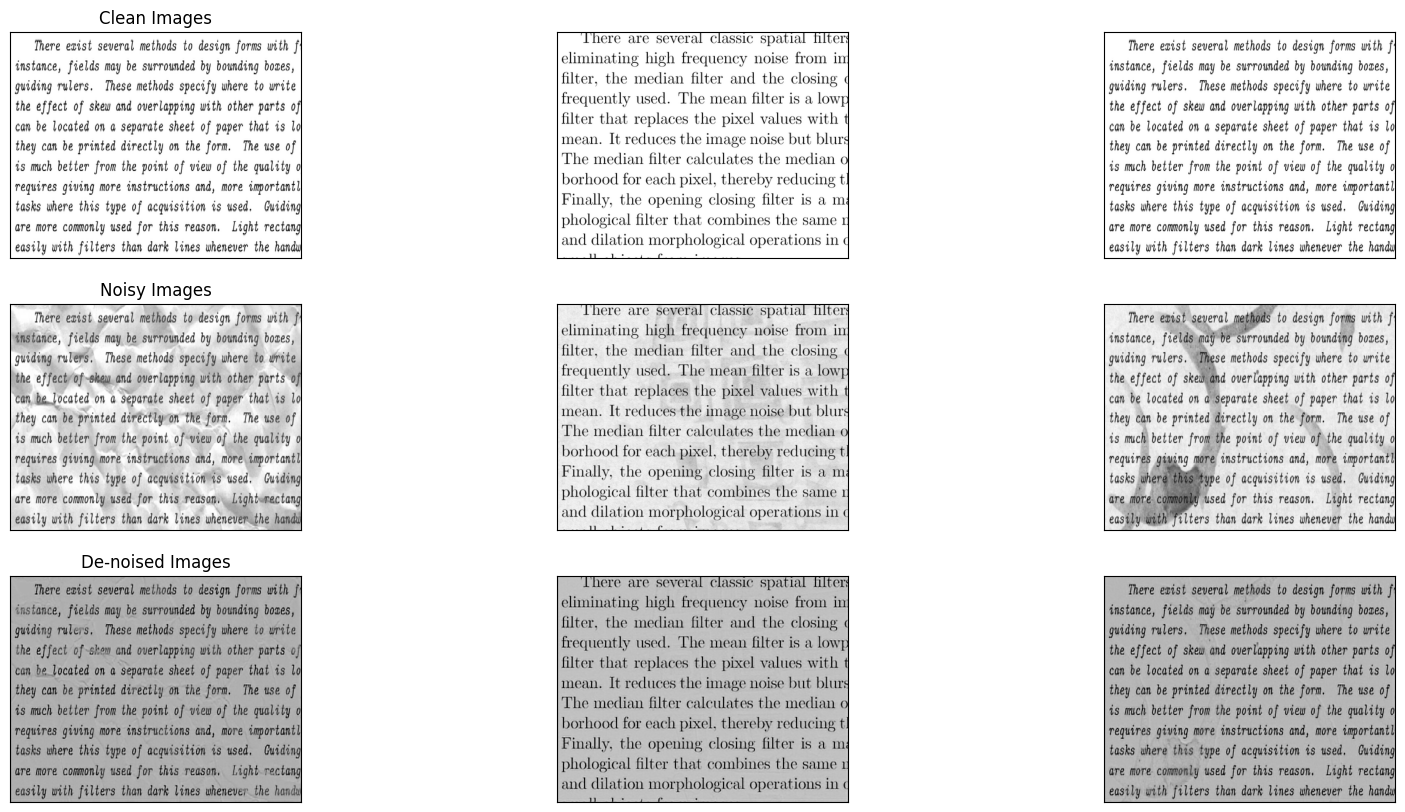

In [85]:
train_predictions = best_model.predict(x_train[5:8])
plot_images(clean_data=y_train[5:8], noisy_data=x_train[5:8], predicted_data=train_predictions)

<span style="font-size: 18px;">
<div class="alert alert-block alert-success">
<b>Comment:</b>

The de-noised images in the above cell look clear enough. However, they still don't have the white background that the clean images have.
Also, the input values are all between 0 to 1. Hence, for the final output layer I have changed the activation function from ReLU to Sigmoid function so that the output values are between 0 to 1 as well. 
The predicted values in the below-mentioned cell aren't between 0 to 1.

</div>
</span>

In [ ]:
print(train_predictions[0])

[[[0.6415954 ]
  [0.89166605]
  [0.9664772 ]
  ...
  [1.0120395 ]
  [0.9092293 ]
  [0.5194602 ]]

 [[0.79586756]
  [0.9239785 ]
  [0.9263694 ]
  ...
  [1.0571933 ]
  [0.9883833 ]
  [0.81163883]]

 [[0.9134005 ]
  [0.9698149 ]
  [0.9421359 ]
  ...
  [0.9840192 ]
  [1.0031793 ]
  [0.8986644 ]]

 ...

 [[0.9940069 ]
  [0.97236913]
  [1.0520674 ]
  ...
  [0.9843301 ]
  [1.0279757 ]
  [0.9606812 ]]

 [[0.9895137 ]
  [1.0248567 ]
  [1.0903298 ]
  ...
  [0.98436624]
  [0.90755546]
  [0.9564088 ]]

 [[0.68022674]
  [0.80705583]
  [0.9966057 ]
  ...
  [0.8925146 ]
  [0.72944283]
  [0.6809639 ]]]


In [86]:
'''Rebuilding the AutoEncoder using the best parameters obtained from the previous hyper-paramter tuning and 
using the sigmoid activation function in the last layer '''
# print(best_params.values)
class AutoEncoder(tf.keras.models.Model):
  def __init__(self):
    super(AutoEncoder, self).__init__()
    self.encoder = tf.keras.Sequential([
      tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same',
                             kernel_regularizer=tf.keras.regularizers.L1(1.5456105073004486e-08)),
      tf.keras.layers.MaxPooling2D((2, 2), padding='same'),
      tf.keras.layers.Conv2D(16, (2, 2), activation='relu', padding='same'),
      tf.keras.layers.BatchNormalization()
    ])

    self.decoder = tf.keras.Sequential([
      tf.keras.layers.Conv2DTranspose(16,(3,3),strides=(1,1),activation='relu',padding='same',
                                      kernel_regularizer=tf.keras.regularizers.L1(1.5456105073004486e-08)),
      tf.keras.layers.Conv2DTranspose(32,(3,3),strides=(2,2),activation='relu',padding='same'),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.Dropout(0.4),
      tf.keras.layers.Conv2D(1,(3,3),strides=(1,1),activation='sigmoid',padding='same'),
      ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded


In [87]:
autoencoder_3 = AutoEncoder()

autoencoder_3.compile(optimizer='adam', loss='mse')

autoencoder_3.fit(x_train, y_train,
          epochs=20,
          batch_size=4,
          validation_split=0.2,
          shuffle=True)

Epoch 1/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 8s 253ms/step - loss: 0.1747 - val_loss: 0.0763
Epoch 2/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 7s 247ms/step - loss: 0.0762 - val_loss: 0.0681
Epoch 3/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 243ms/step - loss: 0.0679 - val_loss: 0.0602
Epoch 4/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 235ms/step - loss: 0.0576 - val_loss: 0.0421
Epoch 5/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 233ms/step - loss: 0.0379 - val_loss: 0.0248
Epoch 6/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 238ms/step - loss: 0.0213 - val_loss: 0.0165
Epoch 7/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 232ms/step - loss: 0.0150 - val_loss: 0.0131
Epoch 8/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 236ms/step - loss: 0.0118 - val_loss: 0.0112
Epoch 9/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 234ms/step - loss: 0.0103 - val_loss: 0.0096
Epoch 10/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 247ms/step - loss: 0.0087 - val_loss: 0.0085
Epoch 11/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 240ms/step - loss: 0.0074 - val_loss: 0.0076
Epoch 12/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 242ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


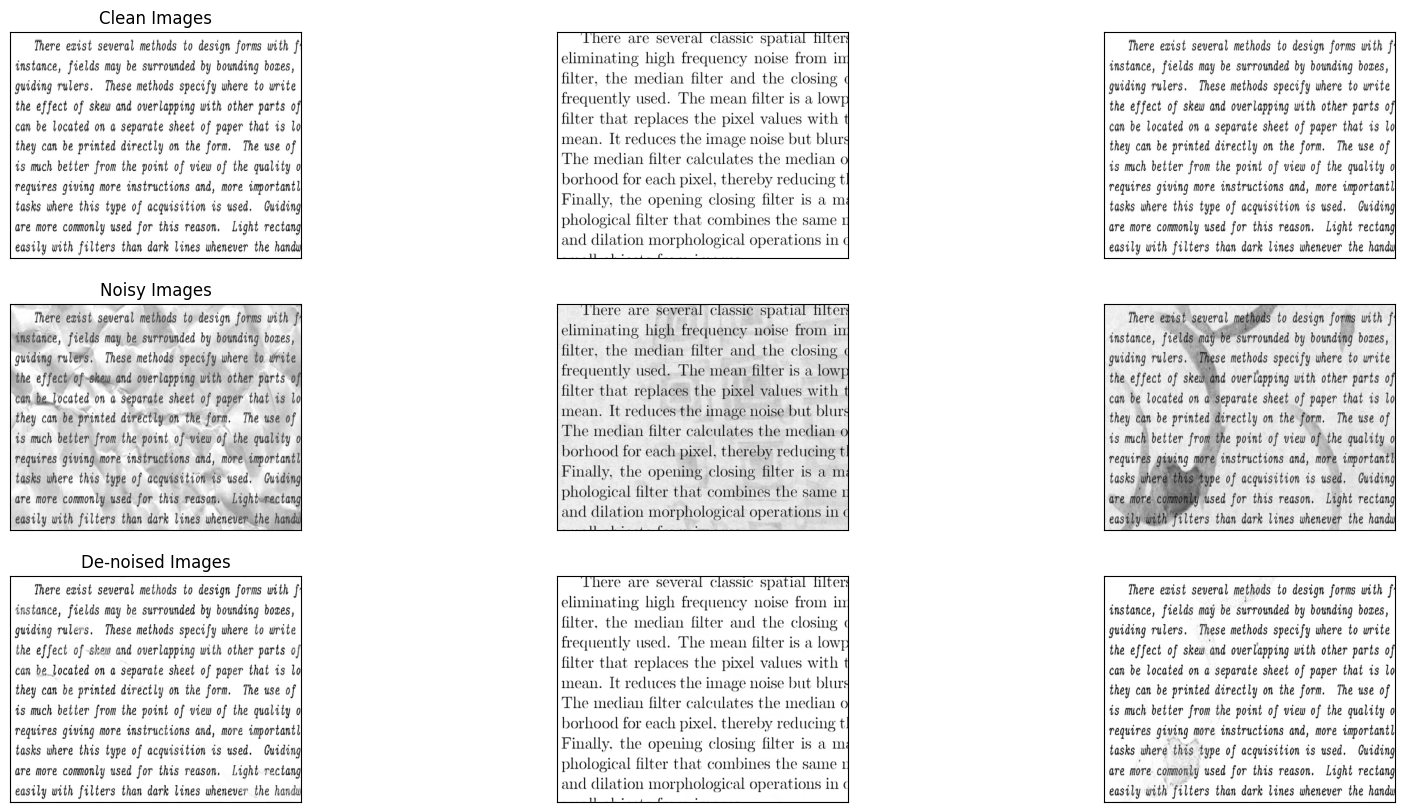

In [88]:
train_predictions = autoencoder_3.predict(x_train[5:8])
plot_images(clean_data=y_train[5:8], noisy_data=x_train[5:8], predicted_data=train_predictions)

<span style="font-size: 18px;">
<div class="alert alert-block alert-success">
<b>Comment:</b>

The de-noised images in the above cell have a white background now and are clearer. The dark stains in the rightmost image are almost gone and the validation error has reduced to <b>0.0044</b>. Now, I am have increased the number of epochs in the next model to see if I can get lesser error.

</div>
</span>

In [89]:
autoencoder_4 = AutoEncoder()

autoencoder_4.compile(optimizer='adam', loss='mse')

autoencoder_4.fit(x_train, y_train,
          epochs=30,
          batch_size=4,
          validation_split=0.2,
          shuffle=True)

Epoch 1/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 8s 248ms/step - loss: 0.1847 - val_loss: 0.0713
Epoch 2/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 233ms/step - loss: 0.0713 - val_loss: 0.0610
Epoch 3/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 234ms/step - loss: 0.0566 - val_loss: 0.0412
Epoch 4/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 229ms/step - loss: 0.0354 - val_loss: 0.0215
Epoch 5/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 240ms/step - loss: 0.0205 - val_loss: 0.0157
Epoch 6/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 237ms/step - loss: 0.0148 - val_loss: 0.0118
Epoch 7/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 236ms/step - loss: 0.0109 - val_loss: 0.0098
Epoch 8/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 229ms/step - loss: 0.0089 - val_loss: 0.0088
Epoch 9/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 226ms/step - loss: 0.0081 - val_loss: 0.0076
Epoch 10/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 234ms/step - loss: 0.0071 - val_loss: 0.0070
Epoch 11/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 233ms/step - loss: 0.0066 - val_loss: 0.0064
Epoch 12/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 232ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step


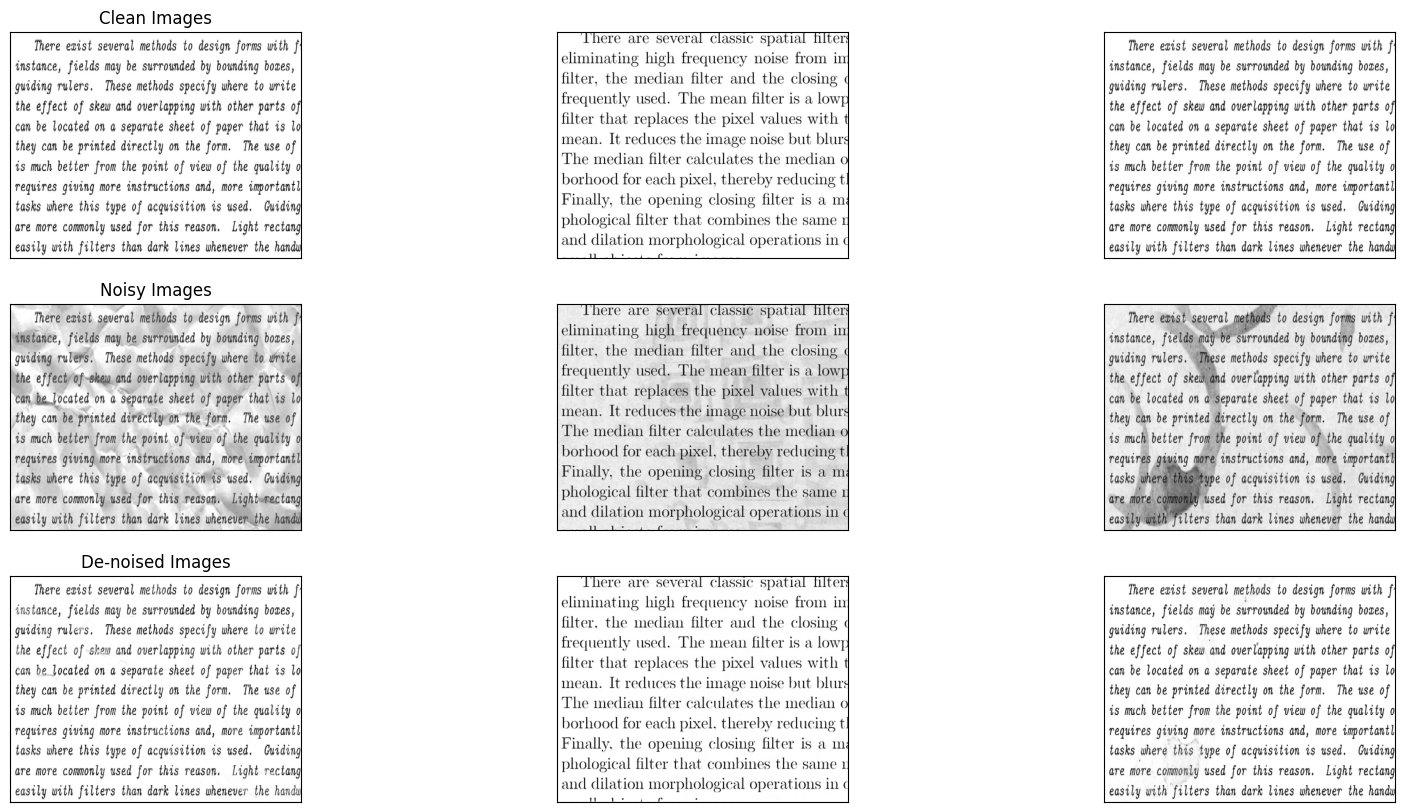

In [90]:
train_predictions = autoencoder_4.predict(x_train[5:8])
plot_images(clean_data=y_train[5:8], noisy_data=x_train[5:8], predicted_data=train_predictions)

<span style="font-size: 18px;">
<div class="alert alert-block alert-success">
<b>Comment:</b>

The de-noised images in the above cell are better after increasing the number of epochs. As per validation loss values printed by the fit() function, it's clear that the loss is consistently decreasing (final val_loss of <b>0.0032</b>). The stain in the rightmost de-noised image in the above cell is also fainter than previous model's image. 

In the below model, I have used an exponential decay schedule for the learning rate. The idea is to decrease the learning rate as the model approaches closed to the solution so that it doesn't miss the optimal solution. 

The reference I studied from: https://www.geeksforgeeks.org/learning-rate-decay/

</div>
</span>

In [94]:
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-3,
    decay_steps=1000,
    decay_rate=0.9
)
autoencoder_5 = AutoEncoder()

autoencoder_5.compile(optimizer=tf.keras.optimizers.Adam(lr_schedule), loss='mse')

autoencoder_5.fit(x_train, y_train,
          epochs=30,
          batch_size=4,
          validation_split=0.2,
          shuffle=True)

Epoch 1/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 9s 262ms/step - loss: 0.1836 - val_loss: 0.0754
Epoch 2/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 233ms/step - loss: 0.0763 - val_loss: 0.0658
Epoch 3/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 230ms/step - loss: 0.0642 - val_loss: 0.0471
Epoch 4/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 235ms/step - loss: 0.0430 - val_loss: 0.0329
Epoch 5/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 237ms/step - loss: 0.0290 - val_loss: 0.0185
Epoch 6/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 233ms/step - loss: 0.0166 - val_loss: 0.0136
Epoch 7/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 233ms/step - loss: 0.0132 - val_loss: 0.0117
Epoch 8/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 239ms/step - loss: 0.0112 - val_loss: 0.0106
Epoch 9/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 237ms/step - loss: 0.0100 - val_loss: 0.0095
Epoch 10/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 7s 256ms/step - loss: 0.0090 - val_loss: 0.0087
Epoch 11/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 235ms/step - loss: 0.0080 - val_loss: 0.0080
Epoch 12/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 236ms/step

In [96]:
train_predictions = autoencoder_5.predict(x_train[5:8])
plot_images(clean_data=y_train[5:8], noisy_data=x_train[5:8], predicted_data=train_predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


<span style="font-size: 18px;">
<div class="alert alert-block alert-success">
<b>Comment:</b>

The training and validation loss of the model without the exponential learning rate deay were slightly better. Hence, for my final model I have chosen that one (autoencoder_4). In the cell below, I am training the final model using the entire dataset and then plotting the images for the training and testing dataset

</div>
</span>

In [97]:
autoencoder_5.fit(x_train, y_train,
          epochs=30,
          batch_size=4,
          shuffle=True)

Epoch 1/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 9s 272ms/step - loss: 0.0037
Epoch 2/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 7s 215ms/step - loss: 0.0037
Epoch 3/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 7s 214ms/step - loss: 0.0033
Epoch 4/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 7s 214ms/step - loss: 0.0036
Epoch 5/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 7s 207ms/step - loss: 0.0032
Epoch 6/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 7s 209ms/step - loss: 0.0030
Epoch 7/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 7s 215ms/step - loss: 0.0030
Epoch 8/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 7s 212ms/step - loss: 0.0030
Epoch 9/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 7s 207ms/step - loss: 0.0029
Epoch 10/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 7s 208ms/step - loss: 0.0028
Epoch 11/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 7s 206ms/step - loss: 0.0028
Epoch 12/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 7s 206ms/step - loss: 0.0028
Epoch 13/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 7s 207ms/step - loss: 0.0030
Epoch 14/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 7s 217ms/step - loss: 0.0029
Epoch 15/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 7s 213ms/step - lo

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step


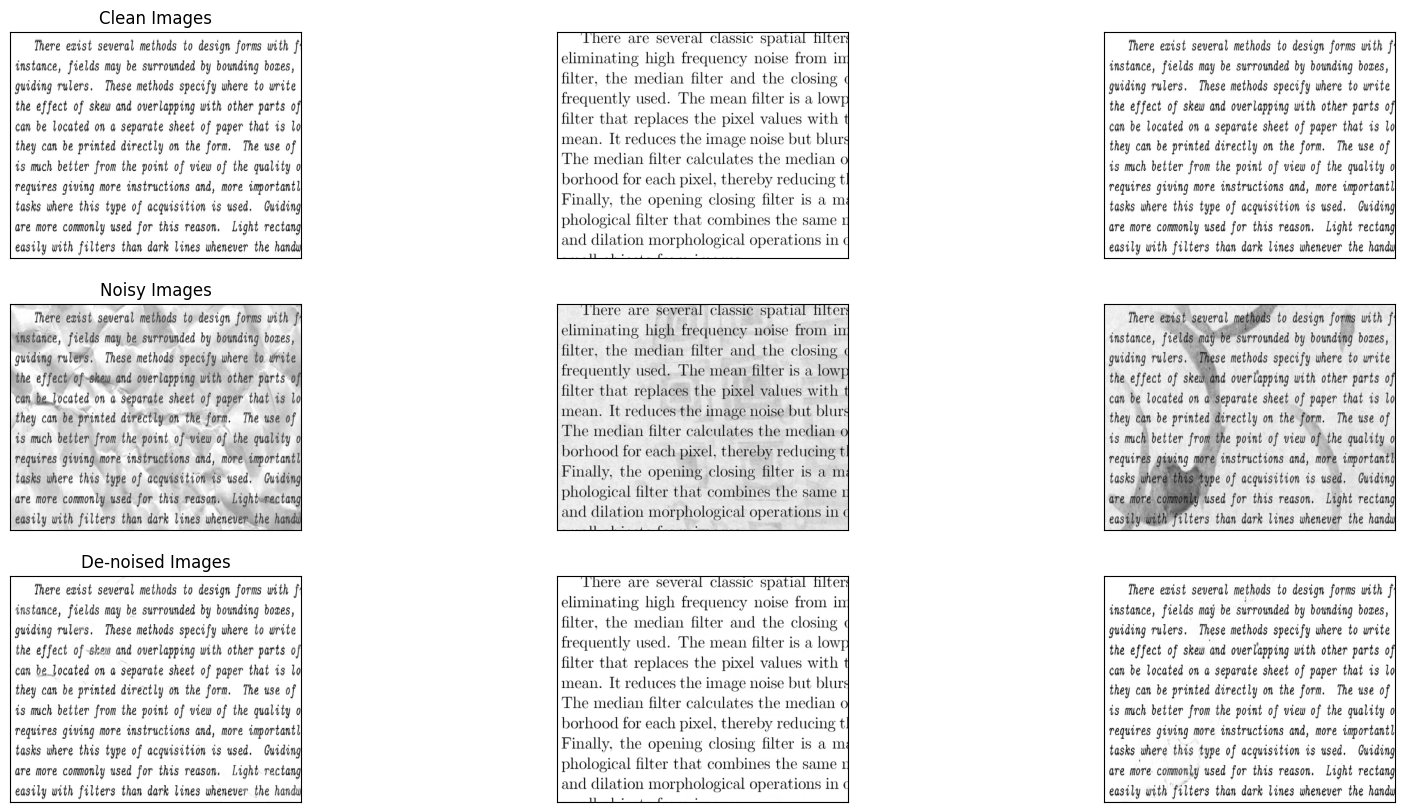

In [107]:
'''Training set predictions and visualisation'''
train_predictions = autoencoder_5.predict(x_train[5:8])
plot_images(clean_data=y_train[5:8], noisy_data=x_train[5:8], predicted_data=train_predictions)

In [112]:
'''Test set predictions and visualisation'''

test_predictions = autoencoder_5.predict(x_test[:3])
plt.figure(figsize=(20, 10))
n = len(train_predictions)
for i, img in enumerate(x_test[:3]):
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(img.reshape(420, 540))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  if i == 0:
    ax.set_title('Noisy Images')
for i, img in enumerate(test_predictions[0:3]):
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(img.reshape(420, 540))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  if i == 0:
      ax.set_title('De-noised Images')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


### FINAL EXPLANATION
<span style="font-size: 18px;">
<div class="alert alert-block alert-success">

The final training loss <b>0.0022</b> and the model is removing almost all of the noise. Minor noise is still present in the image but if we try to remove it then we face the risk of also removing the important textual features. 

Summary:
1. A broader bottleneck helped capture finer features while a smaller bottleneck compressed the image too much. It resulted in only capturing the dominant features and not learning enough.
2. Adding regularisation, batch-normalisation, and dropout layers helped make the model more robust and prevent overfitting, i.e., learning the noise patterns.
3. Having a Sigmoid activation function instead of ReLU in the output layer ensured that the output values were between 0 and 1 to match the scaled input values.

</div>
</span>